# Lab7 - Interpolação

Esta tarefa explora a interpolação a partir do sinal decimado, fazendo inserção de zeros e filtragem com filtro média móvel.

In [1]:
from pylab import *

a) Considerando um sinal senoidal de 100 Hz amostrado a uma taxa de 1000 A/s durante 0,2 s, construa o vetor a. Plote o sinal amostrado (plot) em função de n e seu espectro (stem) em função da frequencia digital w (rad) no eixo horizontal inferior e a frequencia equivalente em Hertz no eixo horizontal superior.

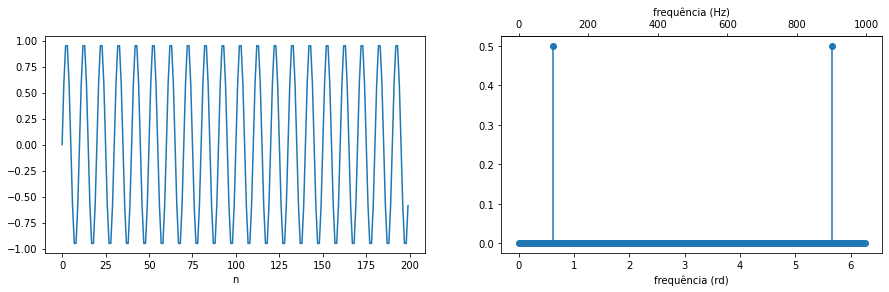

In [2]:
F=100; Fs=1000; T=0.2

N=Fs * T; n=arange(N)
a=sin(2*pi*(F/Fs)*n)

def plotas(x,Fs):
    X=fft(x)/N
    w=linspace(0,2*pi,num=len(X),endpoint=False)

    figure(figsize=(15,4))
    subplot(1,2,1)
    plot(x)
    xlabel('n')
    ax=subplot(1,2,2)
    stem(w,abs(X),linefmt='C0-',markerfmt='C0o',basefmt='C0-')

    def w2f(x):
       return x * Fs / (2*pi)
    def f2w(x):
       return x * 2*pi / Fs
    ax2=ax.secondary_xaxis("top",functions=(w2f,f2w))
    ax2.set_xlabel("frequência (Hz)")
    ax.set_xlabel("frequência (rd)")
    show()

    
plotas(a,Fs)

b) Construa o vetor b, considerando um sinal composto pela soma de três senoides: 60, 110, 160 Hz, com amplitudes 3, 2 e 1, amostrado a uma taxa de 1000 A/s durante 0,2 s. Plote o sinal amostrado (plot) e seu espectro (stem).


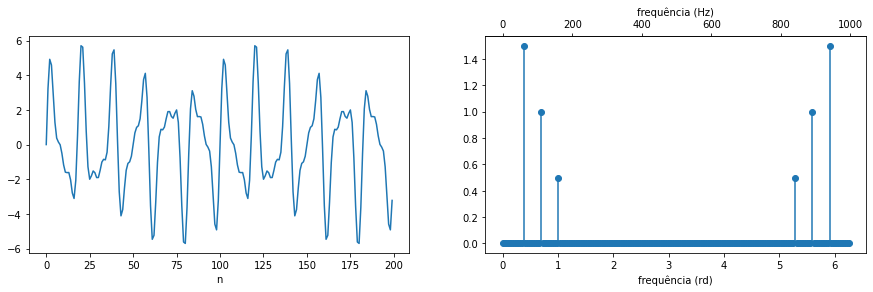

In [3]:
f1=60; f2=110; f3=160; Fs=1000; T=0.2
N=Fs*T; n=arange(N);
s1 = 3*sin(2*pi*(f1/Fs)*n);
s2 = 2*sin(2*pi*(f2/Fs)*n);
s3 = 1*sin(2*pi*(f3/Fs)*n);
b = s1+s2+s3;

plotas(b,Fs)

c) Considere que o sinal do item (b) foi amostrado a 500 A/s. Ou seja, construa o vetor c a partir da decimação do vetor b, jogando fora uma amostra para cada amostra. Plote o sinal amostrado (plot) e seu espectro (stem). 


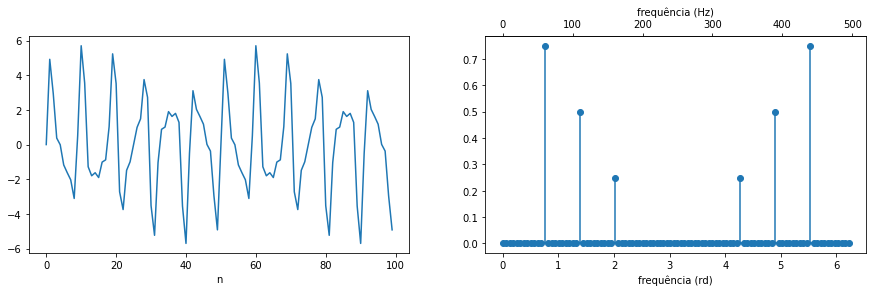

In [4]:
c = b[::2]

plotas(c,500)

d) Considere que o sinal do item (c) foi amostrado a 250 A/s. Ou seja,Construa o vetor d a partir da decimação do vetor c, jogando fora uma amostra para cada amostra. Plote o sinal amostrado (plot) e seu espectro (stem). 


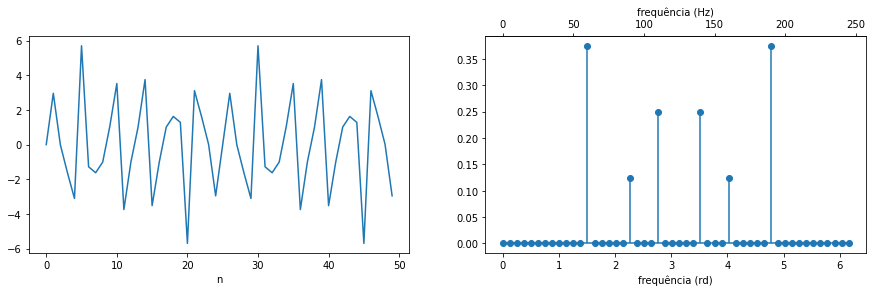

In [5]:
d = c[::2]

plotas(d,250)

e) construa o vetor e, inserindo zeros entre as amostras do vetor c. Plote o sinal (plot) e seu espectro (stem). 

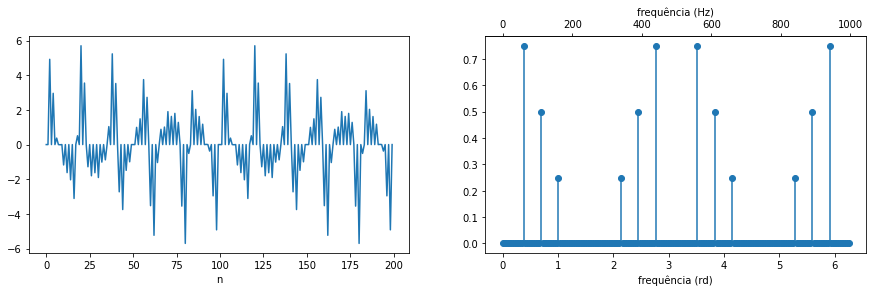

In [6]:
e=zeros(200);
e[0::2] = c;
Fs=1000
plotas(e,Fs)

f) contrua o vetor f, inserindo três zeros entre as amostras do vetor d. Plote o sinal (plot) e seu espectro (stem). 

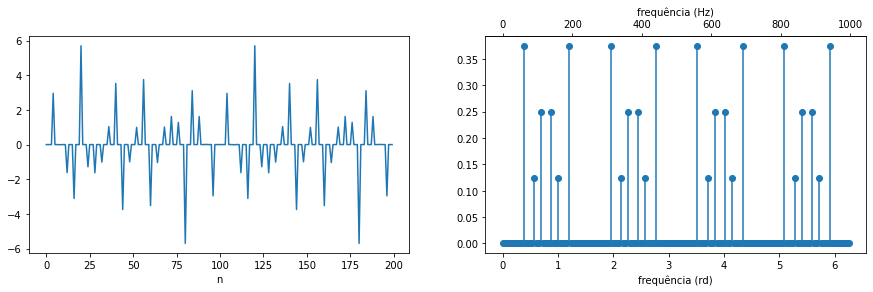

In [7]:
Fs=1000
f = zeros(200)
f[0::4] = d
plotas(f,Fs)

h) Defina função somamovel:<br>
```
def somamovel(x,N=3):
    """
    Filtro soma-movel ordem N. Não causal. Média entre os vizinhos anteriores (N/2) 
    e posteriores (N/2).
    """
```

In [13]:
## Função com loop
def somamovel(x, N):
    n = int((N-1)/2)
    y = zeros(len(x))
    for i in range(len(x)-n):
        y[i] += x[i]
        for j in range(-n,n):
            y[i] += x[i-n]+x[i+n]
        y[i] = y[i]/3
    return y

## A função convolve deixa o espectro de frequência bagunçado
#def somamovel(x, N):
#    return convolve(x, ones(N), 'valid')/N

i) Obtenha o sinal (i) filtrando o sinal (e) como filtro somamovel (N=3). Plote os sinais (e) e (i) no mesmo eixo. Plote o espectro do sinale mostre o resultado o resultado e seu espectro.

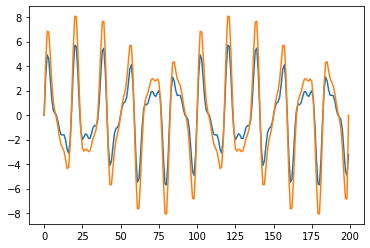

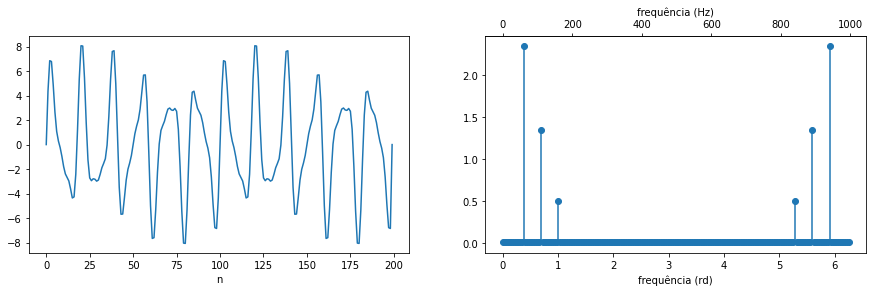

In [17]:
plot(b)
i=somamovel(b, 3)
plot(i)
plotas(i, Fs)

j) Obtenha o sinal (j) filtrando o sinal (f) como filtro somamovel (N=5). Plote os sinais (b) e (j) no mesmo eixo. Plote o espectro do sinale mostre o resultado o resultado e seu espectro.

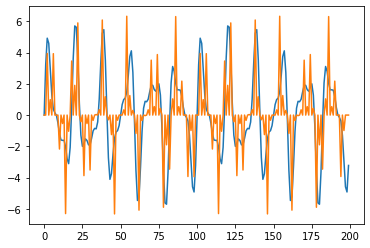

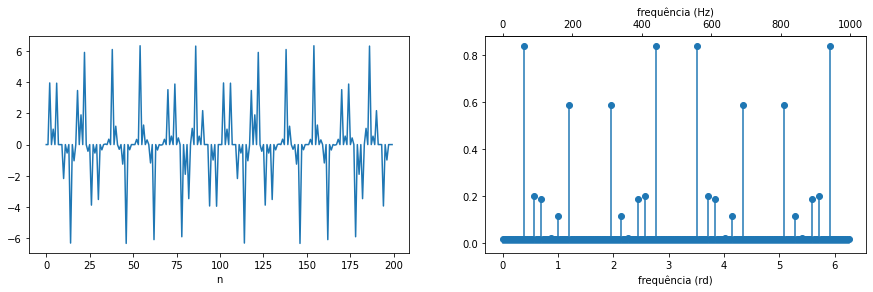

In [18]:
plot(b)
j=somamovel(f, 5)
plot(j)
plotas(j, Fs)